In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()

In [3]:
# you dont need this on your machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Creating pipeline

In [4]:
BATCH_SIZE = 32

### Creating train tf.data.dataset

In [5]:
cwd = os.getcwd()
train_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/3_10000/train_3_10000.csv'
train_df = pd.read_csv(train_file_path)

In [6]:
## converting the labels into unique integers
train_df['label'] = train_df.label.astype('category').cat.codes

In [7]:
## train_3_half.csv
train_labels = train_df.pop('label')

In [8]:
train_df = train_df / 255.0

In [9]:
train_df.head()

,byte1,byte2,byte3,byte4,byte5,byte6,byte7,byte8,byte9,byte10,...,byte1472,byte1473,byte1474,byte1475,byte1476,byte1477,byte1478,byte1479,byte1480,packet_length
0,0.003922,0.733333,0.854902,0.839216,0.462745,0.501961,0.411765,0.894118,0.862745,0.231373,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.600000
1,0.003922,0.733333,0.611765,0.086275,0.349020,0.666667,0.949020,0.149020,0.537255,0.752941,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.733333
2,0.003922,0.733333,0.925490,0.403922,0.905882,0.360784,0.411765,0.403922,0.694118,0.760784,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.600000
3,0.003922,0.733333,0.733333,0.270588,0.635294,0.909804,0.113725,0.015686,0.313725,0.666667,...,0.505882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.772549
4,0.003922,0.733333,0.835294,0.878431,0.356863,0.623529,0.600000,0.474510,0.792157,0.145098,...,0.717647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.772549


In [10]:
train_df = train_df.drop('packet_length', axis = 1)

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values, train_labels.values))

In [12]:
## Just a quick test
for feat, targ in train_dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [0.00392157 0.73333333 0.85490196 ... 0.         0.         0.        ], Target: 2
Features: [0.00392157 0.73333333 0.61176471 ... 0.         0.         0.        ], Target: 2
Features: [0.00392157 0.73333333 0.9254902  ... 0.         0.         0.        ], Target: 2
Features: [0.00392157 0.73333333 0.73333333 ... 0.         0.         0.        ], Target: 2
Features: [0.00392157 0.73333333 0.83529412 ... 0.         0.         0.        ], Target: 2


In [13]:
train_dataset = train_dataset.shuffle(len(train_df)).batch(BATCH_SIZE)

## Creating validation tf.data.dataset

In [14]:
validation_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/3_10000/val_3_10000.csv'
validation_df = pd.read_csv(validation_file_path)

In [15]:
## converting the labels into unique integers
validation_df['label'] = validation_df.label.astype('category').cat.codes

In [16]:
## train_3_half.csv
validation_labels = validation_df.pop('label')

In [17]:
validation_df = validation_df / 255.0

In [18]:
validation_df = validation_df.drop('packet_length', axis = 1)

In [19]:
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_df.values, validation_labels.values))

In [20]:
## Just a quick test
for feat, targ in validation_dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [0.00392157 0.73333333 0.7254902  ... 0.         0.         0.        ], Target: 1
Features: [0.00392157 0.73333333 0.76078431 ... 0.         0.         0.        ], Target: 0
Features: [0.00392157 0.73333333 0.95686275 ... 0.         0.         0.        ], Target: 0
Features: [0.94117647 0.22745098 0.00392157 ... 0.         0.         0.        ], Target: 2
Features: [0.00392157 0.73333333 0.6627451  ... 0.         0.         0.        ], Target: 2


In [21]:
validation_dataset = validation_dataset.shuffle(len(validation_df)).batch(BATCH_SIZE)

### Creating test tf.data.dataset

In [22]:
test_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/3_10000/test_3_10000.csv'
test_df = pd.read_csv(test_file_path)

In [23]:
## converting the labels into unique integers
test_df['label'] = test_df.label.astype('category').cat.codes

In [24]:
## test_3_half.csv
test_labels = test_df.pop('label')

In [25]:
test_df = test_df / 255.0

In [26]:
test_df = test_df.drop('packet_length', axis = 1)

In [27]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.values, test_labels.values))

In [28]:
## Just a quick test
for feat, targ in test_dataset.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))

Features: [0.00392157 0.73333333 0.9372549  ... 0.         0.         0.        ], Target: 2
Features: [0.00392157 0.73333333 0.53333333 ... 0.         0.         0.        ], Target: 1
Features: [0.00392157 0.73333333 0.53333333 ... 0.         0.         0.        ], Target: 1
Features: [0.00392157 0.73333333 0.53333333 ... 0.         0.         0.        ], Target: 1
Features: [0.00392157 0.73333333 0.73333333 ... 0.         0.         0.        ], Target: 2


In [29]:
test_dataset = test_dataset.shuffle(len(test_df)).batch(BATCH_SIZE)

## Create and train the NN

In [30]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [31]:
model = get_compiled_model()
history = model.fit(train_dataset, epochs=20, validation_data = validation_dataset)

Train for 600 steps, validate for 150 steps
Epoch 1/20
600/600 [==============================] - 8s 13ms/step - loss: 0.4782 - accuracy: 0.8056 - val_loss: 0.3927 - val_accuracy: 0.8527
Epoch 2/20
600/600 [==============================] - 7s 12ms/step - loss: 0.2630 - accuracy: 0.9031 - val_loss: 0.2658 - val_accuracy: 0.8965
Epoch 3/20
600/600 [==============================] - 8s 14ms/step - loss: 0.2047 - accuracy: 0.9246 - val_loss: 0.2957 - val_accuracy: 0.8929
Epoch 4/20
600/600 [==============================] - 8s 13ms/step - loss: 0.1734 - accuracy: 0.9354 - val_loss: 0.3291 - val_accuracy: 0.8650
Epoch 5/20
600/600 [==============================] - 7s 12ms/step - loss: 0.1488 - accuracy: 0.9457 - val_loss: 0.2269 - val_accuracy: 0.9187
Epoch 6/20
600/600 [==============================] - 8s 14ms/step - loss: 0.1314 - accuracy: 0.9503 - val_loss: 0.2512 - val_accuracy: 0.9167
Epoch 7/20
600/600 [==============================] - 8s 13ms/step - loss: 0.1112 - accuracy: 0.95

## Plotting convergence

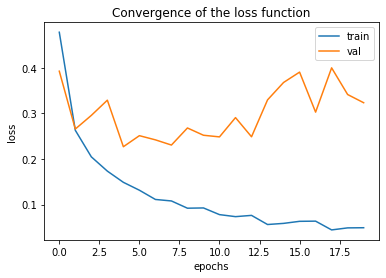

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Convergence of the loss function')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])

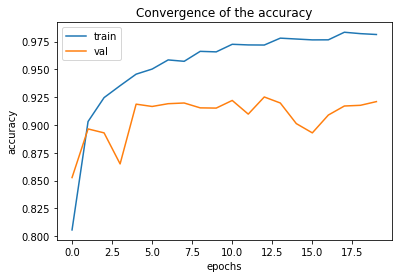

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Convergence of the accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])

## Evaluate the model on the test set

In [34]:
test_result = model.evaluate(test_dataset)
dict(zip(model.metrics_names, test_result))

188/188 [==============================] - 1s 5ms/step - loss: 0.2886 - accuracy: 0.9302


{'loss': 0.2886311972038226, 'accuracy': 0.93016666}